# Decision Trees and Random Forests in Python

This is the code for the lecture video which goes over tree methods in Python. Reference the video lecture for the full explanation of the code!

I also wrote a [blog post](https://medium.com/@josemarcialportilla/enchanted-random-forest-b08d418cb411#.hh7n1co54) explaining the general logic of decision trees and random forests which you can check out. 

## Import Libraries

In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('kyphosis.csv')

In [5]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


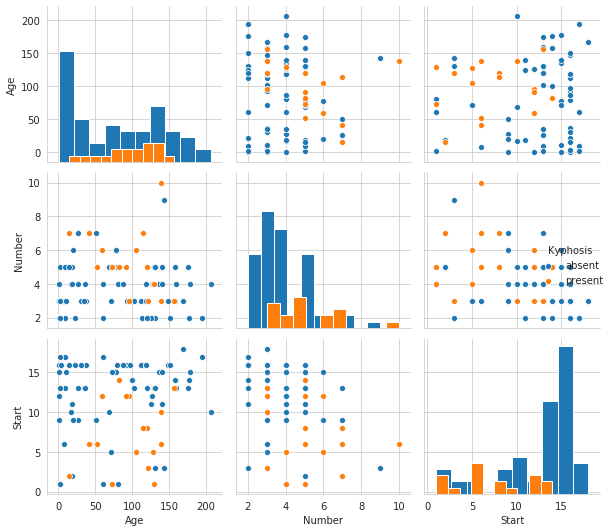

In [23]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='Kyphosis',diag_kind='hist')
plt.tight_layout()

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df.drop('Kyphosis', axis=1)

In [26]:
y = df['Kyphosis']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dtree = DecisionTreeClassifier()

In [74]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [75]:
predictions = dtree.predict(X_test)

In [76]:
from sklearn.metrics import confusion_matrix, classification_report, explained_variance_score

In [77]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[20  1]
 [ 3  1]]
              precision    recall  f1-score   support

      absent       0.87      0.95      0.91        21
     present       0.50      0.25      0.33         4

    accuracy                           0.84        25
   macro avg       0.68      0.60      0.62        25
weighted avg       0.81      0.84      0.82        25



In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rfc = RandomForestClassifier(n_estimators=200)

In [80]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [81]:
rfc_pred = rfc.predict(X_test)

In [82]:
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

[[20  1]
 [ 4  0]]
              precision    recall  f1-score   support

      absent       0.83      0.95      0.89        21
     present       0.00      0.00      0.00         4

    accuracy                           0.80        25
   macro avg       0.42      0.48      0.44        25
weighted avg       0.70      0.80      0.75        25



In [83]:
rfc.score(X_test, y_test)

0.8

In [84]:
dtree.score(X_test, y_test)

0.84

## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [85]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

In [86]:
import pydot

In [87]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

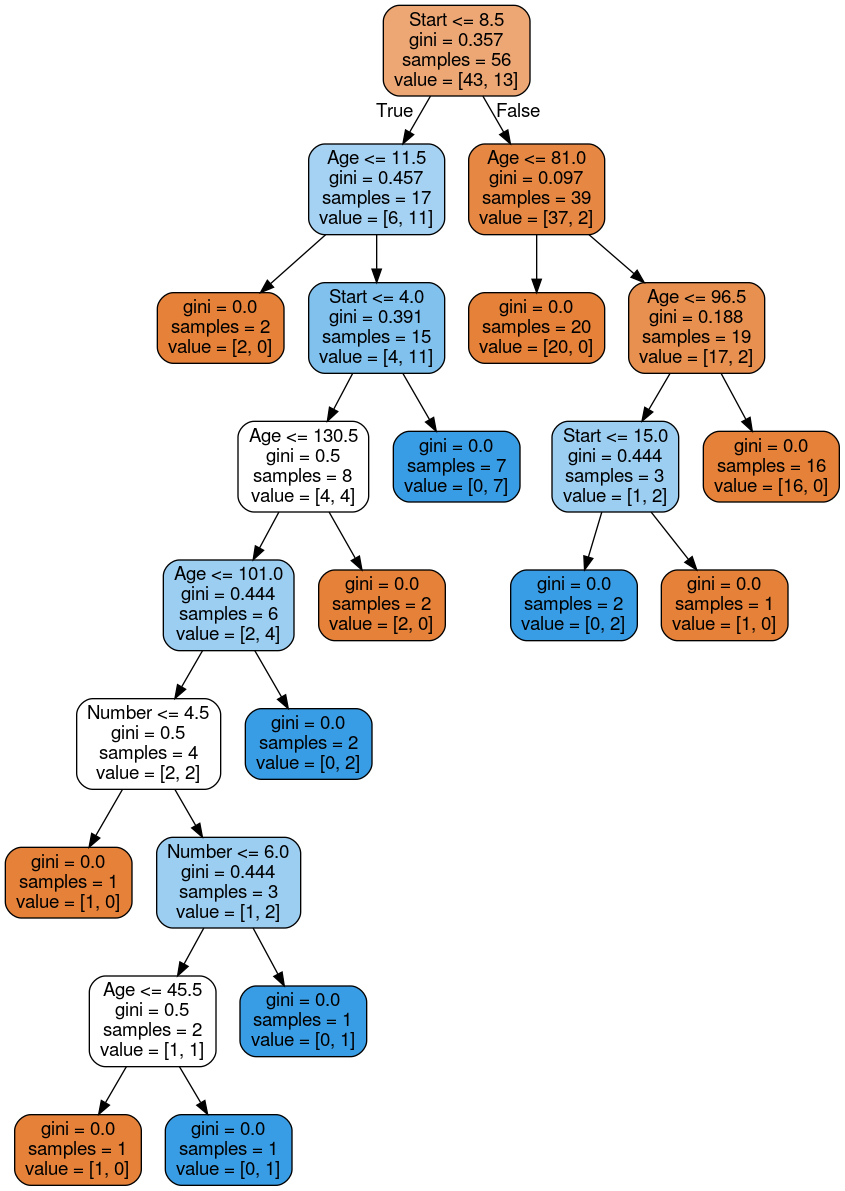

In [88]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())